# Fast AI standard flow using the resnet34 CNN

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pandas as pd
import numpy  as np

In [3]:
# Fetch data from kaggle using kaggle-cli
# kg download -c dog-breed-identification -u Bobox214 -p XXXXX

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [5]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

`PATH` is the path to your data - if you use the recommended setup approaches from the lesson, you won't need to change this. `sz` is the size that the images will be resized to in order to ensure that the training runs quickly. We'll be talking about this parameter a lot during the course. Leave it at `224` for now.

In [6]:
PATH = "data/"
sz=224 #299 224
arch=resnet34 #resnet50 #resnet34 resnext101_64

In [7]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH,'train',f'{PATH}/labels.csv',bs=64,tfms=tfms,suffix='.jpg',test_name='test')

In [8]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [9]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 91%|█████████ | 116/128 [00:02<00:00, 54.42it/s, loss=21.7]


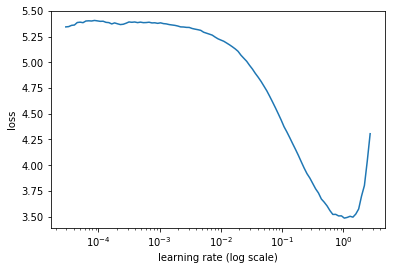

In [10]:
learn.sched.plot()

In [11]:
lr = 0.01

In [12]:
learn.fit(lr,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      2.192894   1.138569   0.764421  
    1      1.143952   0.770267   0.804069                   
    2      0.833776   0.650683   0.818197                    
    3      0.675158   0.597856   0.82946                     
    4      0.596829   0.555551   0.834277                    



[0.5555512, 0.8342773430049419]

In [13]:
learn.precompute=False

In [14]:
learn.fit(lr,3,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.628814   0.531871   0.834766  
    1      0.630611   0.514535   0.839648                    
    2      0.597002   0.517915   0.832357                    



[0.51791483, 0.832356771454215]

In [15]:
tfms299 = tfms_from_model(arch, 299, aug_tfms=transforms_side_on, max_zoom=1.1)
data299 = ImageClassifierData.from_csv(PATH,'train',f'{PATH}/labels.csv',bs=64,tfms=tfms299,suffix='.jpg',test_name='test')

In [16]:
learn.set_data(data299)
learn.freeze()

In [17]:
learn.fit(lr,3,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.602928   0.448985   0.856803  
    1      0.584138   0.441375   0.859212                    
    2      0.552464   0.433522   0.863151                    



[0.4335225, 0.863151041790843]

In [18]:
learn.unfreeze()

In [19]:
lrs = [lr/100,lr/10,lr]

In [20]:
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.603101   0.472845   0.846484  
    1      0.56517    0.465049   0.853809                    
    2      0.450108   0.449353   0.854329                    
    3      0.45938    0.469944   0.849447                    
    4      0.400388   0.449879   0.861198                    
    5      0.340336   0.439199   0.859701                    
    6      0.289894   0.437017   0.861654                    



[0.4370172, 0.861653646454215]

In [21]:
learn.save(f'std_{sz}_lr_{lr}')

In [22]:
learn.load(f'std_{sz}_lr_{lr}')

In [23]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [24]:
accuracy_np(probs, y)

0.8713307240704501

In [25]:
log_test_preds,test_y = learn.TTA(is_test=True)

In [26]:
test_probs = np.mean(np.exp(log_test_preds),0)

In [27]:
sample_sub = pd.read_csv(f'{PATH}/sample_submission.csv')

In [28]:
sub = pd.concat((sample_sub['id'],pd.DataFrame(test_probs,columns=sample_sub.columns[1:])),axis='columns')

In [29]:
sub.to_csv(f'{PATH}/2_std_fastai_{sz}_lr_{lr}.csv',index=False) ; print(f'{PATH}/2_std_fastai_{sz}_lr_{lr}.csv')

data//2_std_fastai_224_lr_0.01.csv


In [31]:
# Submit data to kaggle using kaggle-cli
# kg submit data/1_data_manipulation.csv -c titanic -u Bobox214 -p XXXXX